In [20]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

In [21]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1:
                axis = ax[j]
            else:
                axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i * nCol + j])

<Figure size 432x288 with 0 Axes>

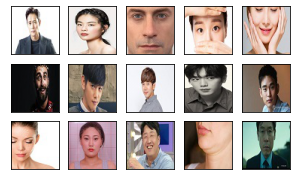

In [22]:
url = 'https://github.com/yuhangyu/ML/raw/main/image/faces/'

face_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64, 64))
    face_images.append(img)

plot_images(3, 5, face_images)

<Figure size 432x288 with 0 Axes>

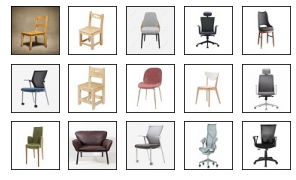

In [23]:
url = 'https://github.com/yuhangyu/ML/raw/main/image/chairs/'

chair_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64, 64))
    chair_images.append(img)

plot_images(3, 5, chair_images)

In [24]:
x_train = face_images +chair_images
y_train = [[1]] * len(face_images) + [[0]] * len(chair_images)
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape, y_train.shape)

(30, 64, 64, 3) (30, 1)


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (64, 64, 3))
x = inputs
_x = layers.Conv2D(128, 3, activation = 'relu', padding = "same")(x)
_x = layers.Conv2D(128, 3, activation = 'relu', padding = "same")(_x)
x = _x
_x = layers.Conv2D(128, 3, activation = 'relu', padding = "same")(x)
_x = layers.Conv2D(128, 3, activation = 'relu', padding = "same")(_x)
x = x + _x
x = layers.MaxPooling2D(2)(x)
_x = layers.Conv2D(128, 3, activation = 'relu', padding = "same")(x)
_x = layers.Conv2D(128, 3, activation = 'relu', padding = "same")(_x)
x = x + _x
x = layers.MaxPooling2D(2)(x)
_x = layers.Conv2D(128, 3, activation = 'relu', padding = "same")(x)
_x = layers.Conv2D(128, 3, activation = 'relu', padding = "same")(_x)
x = x + _x
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dense(128)(x)
x = layers.Dense(2, activation='sigmoid')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 64, 64, 128)  3584        ['input_2[0][0]']                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 64, 64, 128)  147584      ['conv2d_8[0][0]']               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 64, 64, 128)  147584      ['conv2d_9[0][0]']               
                                                                                            

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6709 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 23.5233 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.7357 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 1.3966 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 1.1604 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 0.7999 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 0.6842 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 0.6778 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 2s 2s/step - loss: 0.6837 - accuracy: 0.6000
Epoch 10/100
1/1 [==============================] - 2s 2s/step - loss: 0.6867 - accuracy: 0.5667
Epoch 11/100
1/1 [====================

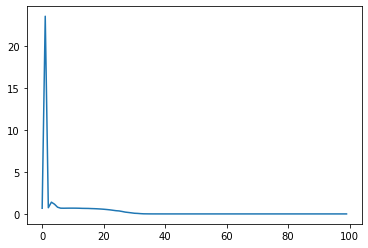

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=100)
plt.plot(history.history['loss'])

<Figure size 432x288 with 0 Axes>

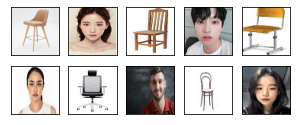

In [27]:
url = 'https://github.com/yuhangyu/ML/raw/main/image/test_img/'

test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64, 64))
    test_images.append(img)

test_images = np.array(test_images)
plot_images(2, 5, test_images)

1/1 [==============================] - 0s 246ms/step


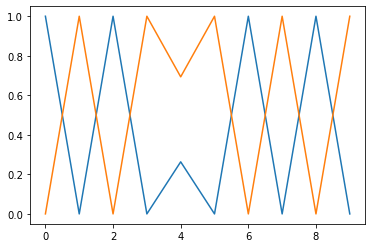

In [28]:
test_result = model.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

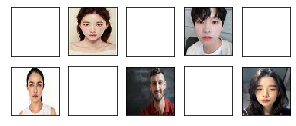

In [30]:
fig = plt.figure()
fig, ax = plt.subplots(2, 5, figsize = (5,  2))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i * 5 + j][1] > 0.7:
            ax[i, j].imshow(test_images[i * 5 + j],interpolation = 'nearest')